# 2021-10-29 Same integration-based deterministic fits again, with expanded grid

Results below are for commit: https://github.com/gmarkkula/COMMOTIONSFramework/commit/5130162d537a297030f63ba4c3814667bb422075 (Rerunning the code below for other commits is not likely/guaranteed to give the same results.)

Reran the same fit as in the notes from yesterday, with the expanded grid:

    PARAM_ARRAYS['k_c'] = np.logspace(np.log10(0.2), np.log10(2), 10)
    PARAM_ARRAYS['k_sc'] = np.logspace(np.log10(0.02), np.log10(0.2), 10)
    PARAM_ARRAYS['thetaDot_1'] = [0.005, 0.01, 0.02, 0.04, 0.08, 0.16, 0.32]
    PARAM_ARRAYS['T_delta'] = (10, 20, 40, 60, 90)
    PARAM_ARRAYS['beta_V'] = (1, 3, 5, 9, 15, 27, 45, 81, 135, 243)
    PARAM_ARRAYS['T_Of'] = (0.5, 1, 2, 4, math.inf)
    PARAM_ARRAYS['sigma_O'] = (0.02, 0.05, 0.1, 0.2, 0.5, 1, 2.5)

This took about 15 hours, so I am getting to the point where expanding model or grid further will be painful...

## Results overview

I am reducing the surplus deceleration requirement for short-stopping to 1 m/s^2, which means that `oVAaoVAloBEooBEvoAI` is able to achieve all four criteria with a single parameterisation. 

In [3]:
%run ../SCPaper/do_2_analyse_deterministic_fits

['C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEo.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEooBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEooBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVA.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAa.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEo.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEooBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEooBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_o

## Closer looks

Looking closer below at the only two models which achieved all four criteria at some point across their parameterisations - but only `oVAaoVAloBEooBEvoAI` achieved all four with a single parameterisation. The results for this model look quite nice!


*** oVAaoVAloBEvoAI
{'T_delta': 10.0, 'thetaDot_1': 0.005, 'beta_V': 1.0}
{'veh_assert_prio': True, 'veh_short_stop': True, 'ped_hesitate_dec': True, 'ped_start_bef_veh_stop': False}
{'ped_hesitate_const': False, 'ped_fast_crossing': True}
	--- ActVehStatPed


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:192: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


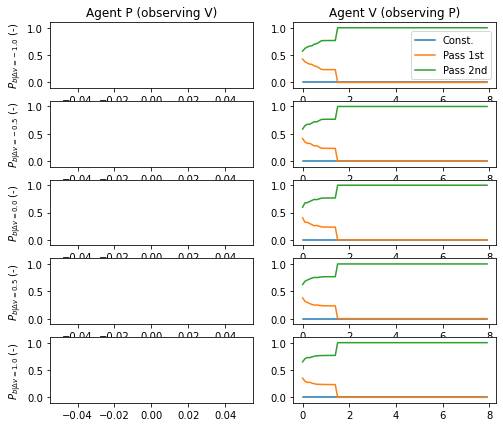

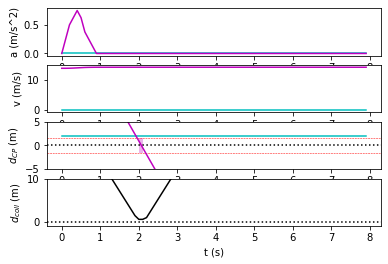

	--- ActVehStatPedPrio


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:192: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


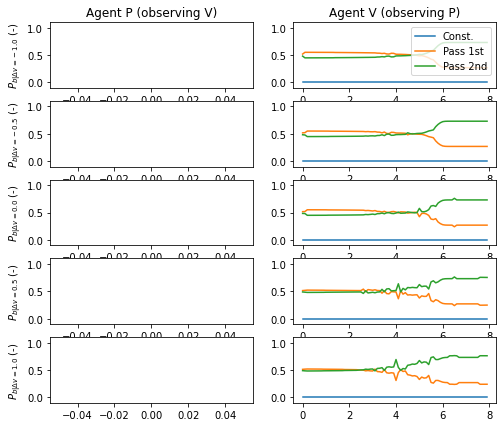

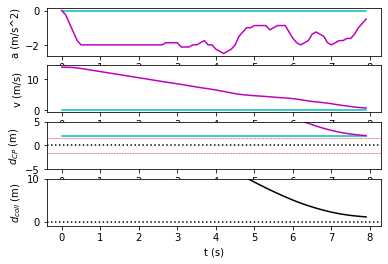

	--- ActPedLeading


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:192: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


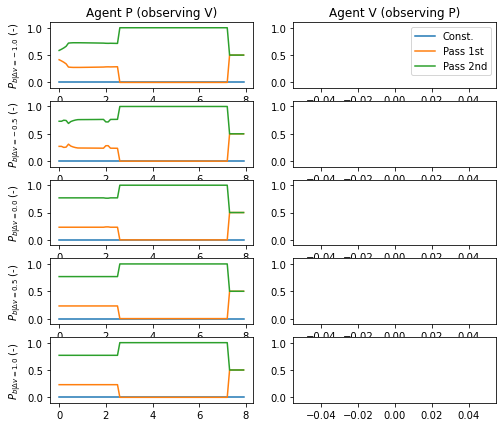

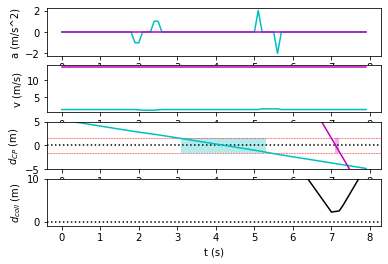

	--- ActPedPrioEncounter


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:192: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


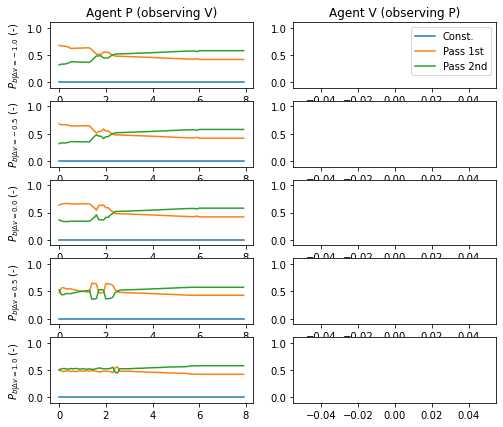

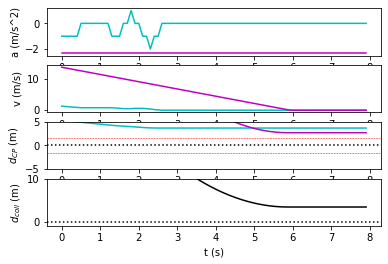


*** oVAaoVAloBEooBEvoAI
{'T_delta': 40.0, 'thetaDot_1': 0.005, 'beta_V': 3.0, 'T_Of': 4.0, 'sigma_O': 0.1}
{'veh_assert_prio': True, 'veh_short_stop': True, 'ped_hesitate_dec': True, 'ped_start_bef_veh_stop': True}
{'ped_hesitate_const': False, 'ped_fast_crossing': True}
	--- ActVehStatPed


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:192: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


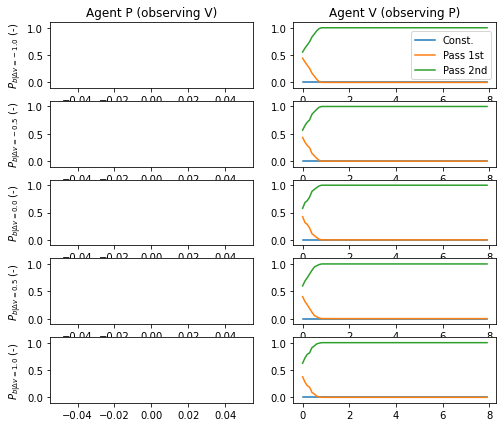

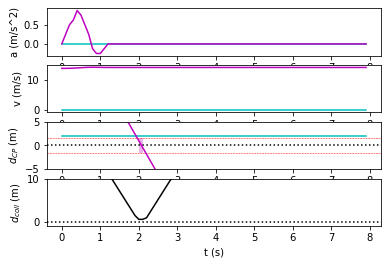

	--- ActVehStatPedPrio


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:192: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


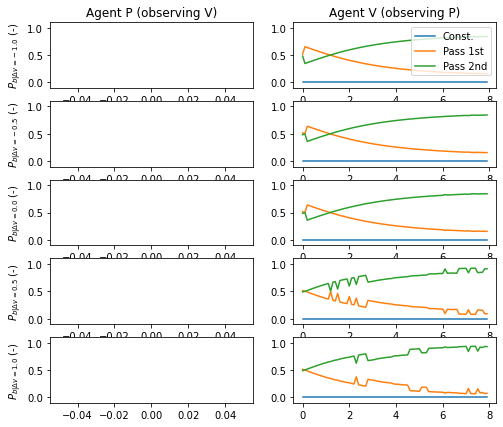

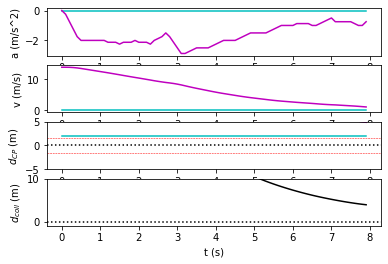

	--- ActPedLeading


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:192: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


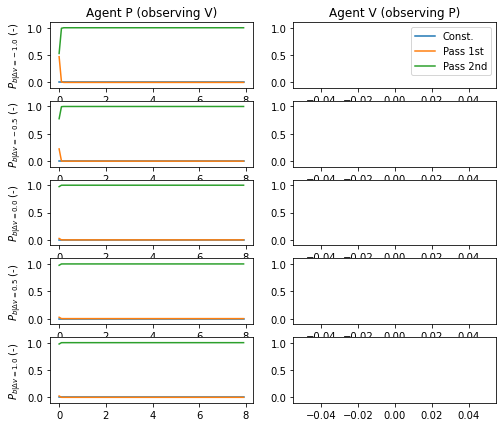

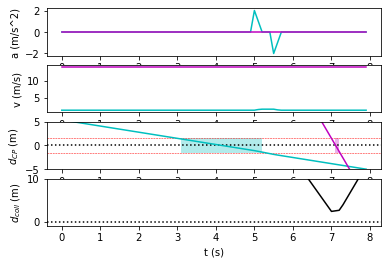

	--- ActPedPrioEncounter


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:192: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


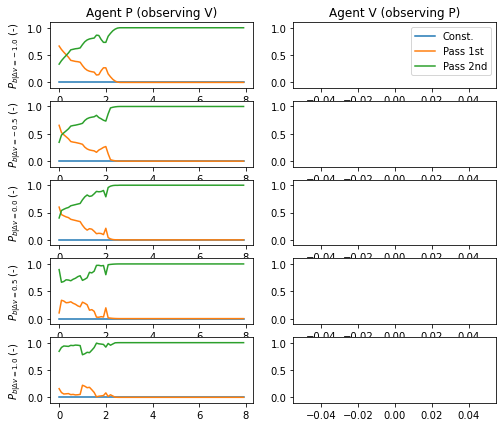

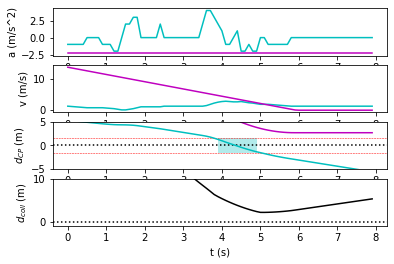

In [4]:
for model in ('oVAaoVAloBEvoAI', 'oVAaoVAloBEooBEvoAI'):
    print(f'\n*** {model}')
    fit = det_fits[model]
    ex = fit.example
    print(ex.params_dict)
    print(ex.main_crit_dict)
    print(ex.sec_crit_dict)
    fit.set_params(ex.params_array)
    for scenario in ('ActVehStatPed', 'ActVehStatPedPrio', 'ActPedLeading', 'ActPedPrioEncounter'):
        print(f'\t--- {scenario}')
        sim = fit.simulate_scenario(sc_fitting.DET1S_SCENARIOS[scenario])
        sim.do_plots(kinem_states=True, beh_probs=True)

## Conclusion

I feel like I this is as far as I need to go with the purely deterministic fits - time to move on to the probabilistic stuff...